
# 2018_2021 회귀 결과  
- LinearRegression, Ridge, Lasso  
LinearRegression RMSE:  1772.777, Ridge RMSE:  1773.044, Lasso RMSE:  1772.809  

- LinearRegression, Ridge, Lasso(log1p적용)  
MSE: 0.163803141315341, RMSE: 0.4047260077081049, R2: 0.7604133980740984   
LinearRegression RMSE:  0.405, Ridge RMSE:  0.405, Lasso RMSE:  0.703  

- LinearRegression, Ridge, Lasso(GridSearchCV)  
MSE: 0.163803141315341, RMSE: 0.4047260077081049, R2: 0.7604133980740984  
LinearRegression RMSE:  0.405, Ridge RMSE:  0.405, Lasso RMSE:  0.41  


- RandomForestRegressor(log1p적용)  
MSE: 0.12283794091253145, RMSE: 0.35048244023421693, R2: 0.8203311327580028  
 
- RandomForestRegressor(GridSearchCV)  
MSE: 0.11591028078606788, RMSE: 0.34045598949947686, R2: 0.8304638721894262  


- XGBoost  
MSE: 0.12260658677536995, RMSE: 0.3501522337146658, R2: 0.8206695227981383  

- GBM  
MSE:  0.131, RMSE:  0.361, R2: 0.8090403174312449  

- LightGBM  
MSE:  0.124, RMSE:  0.352, R2: 0.8192744247717145  


# 최종 결과  
MSE: RandomForestRegressor(GridSearchCV), MSE: 0.11  
RMSE: RandomForestRegressor(GridSearchCV), RMSE: 0.34  
R2: RandomForestRegressor(GridSearchCV), R2: 0.83  

# 최종 모델 
RandomForestRegressor(GridSearchCV)

# import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 전처리


In [2]:
test5 = pd.read_csv('2018_2021_전처리_최종.csv')
test5.round(2)

,총생활인구수,기온,기압,풍속,운량,일강수량,최대순간풍속풍향,최대풍속풍향,평균풍속,최다풍향,일최심적설,일최심신적설,강수여부,일 미세먼지 농도(㎍/㎥),휴일여부,요일,계절,month,day,영등포구
0,10534264.00,2.85,-1.16,-0.74,-1.88,0.0,320,290,1.4,290,0.0,0.0,0.0,38.0,1,0,4,1,1,421.0
1,12237724.00,2.94,-1.15,0.31,-1.74,0.0,270,290,1.8,290,0.0,0.0,0.0,32.0,0,1,4,1,2,820.0
2,12312633.00,3.38,-1.19,-1.03,-1.35,0.0,320,270,2.2,290,0.0,0.0,0.0,32.0,0,2,4,1,3,839.0
3,12368761.00,3.46,-1.19,-1.26,-1.19,0.0,320,320,1.4,290,0.0,0.0,0.0,40.0,0,3,4,1,4,749.0
4,12368042.00,3.00,-1.12,-0.57,-0.89,0.0,250,270,1.7,290,0.0,0.0,0.0,46.0,0,4,4,1,5,878.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,475550.14,3.89,-1.15,-1.57,-0.06,0.0,340,20,1.7,50,0.0,0.0,0.0,33.0,0,0,4,12,27,3517.0
1457,477997.80,3.13,-1.01,-1.74,1.34,0.0,50,50,2.2,50,0.0,0.0,0.0,60.0,0,1,4,12,28,4214.0
1458,478029.06,2.20,-0.86,1.53,1.00,0.2,270,270,2.6,50,0.3,0.3,1.0,70.0,0,2,4,12,29,4126.0
1459,476656.88,3.20,-1.15,2.36,-0.80,0.0,320,290,3.3,270,0.0,0.0,0.0,30.0,0,3,4,12,30,3883.0


# LinearRegression, Ridge, Lasso

In [3]:
test5[[ '강수여부','휴일여부','요일', '계절', 'month','day',]]= test5[[ '강수여부','휴일여부','요일', '계절', 'month','day']].astype('str')

In [4]:
def get_rmse(model):
    import numpy as np
    from sklearn.metrics import mean_squared_error
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, 'RMSE: ', np.round(rmse,3))
    return rmse
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [5]:
X = test5.drop(columns=['영등포구'])
y = test5['영등포구']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

In [6]:
lr_reg = LinearRegression() #선형회귀
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models) # R2 점수 추가함

LinearRegression RMSE:  1772.777
Ridge RMSE:  1773.044
Lasso RMSE:  1772.809


[1772.777210966064, 1773.0439393557238, 1772.809028944851]

In [7]:
# 왜곡도 확인
features_index = test5.dtypes[test5.dtypes != 'object'].index
skew_features= test5[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features>2]
skew_features_top.sort_values(ascending=False)

일최심신적설            12.166799
일최심적설              8.847381
일강수량               5.001375
일 미세먼지 농도(㎍/㎥)     3.246978
dtype: float64

In [8]:
# 왜곡도 2 이상은 로그로 변환
# test5[skew_features_top.index]= np.log1p(test5[skew_features_top.index]+2)
np.log1p(test5[skew_features_top.index])

,일강수량,일최심적설,일최심신적설,일 미세먼지 농도(㎍/㎥)
0,0.000000,0.000000,0.000000,3.663562
1,0.000000,0.000000,0.000000,3.496508
2,0.000000,0.000000,0.000000,3.496508
3,0.000000,0.000000,0.000000,3.713572
4,0.000000,0.000000,0.000000,3.850148
...,...,...,...,...
1456,0.000000,0.000000,0.000000,3.526361
1457,0.000000,0.000000,0.000000,4.110874
1458,0.182322,0.262364,0.262364,4.262680
1459,0.000000,0.000000,0.000000,3.433987


In [9]:
test5.isna().sum()

총생활인구수            0
기온                0
기압                0
풍속                0
운량                0
일강수량              0
최대순간풍속풍향          0
최대풍속풍향            0
평균풍속              0
최다풍향              0
일최심적설             0
일최심신적설            0
강수여부              0
일 미세먼지 농도(㎍/㎥)    0
휴일여부              0
요일                0
계절                0
month             0
day               0
영등포구              0
dtype: int64

<AxesSubplot:xlabel='영등포구', ylabel='Count'>

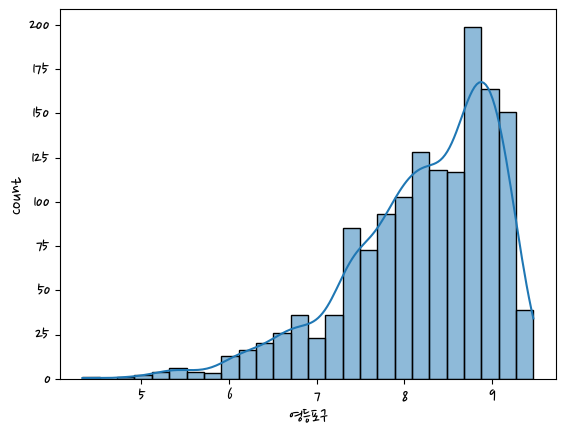

In [10]:
# y값 정규분포로 변환
log_test = np.log1p(test5['영등포구'])
sns.histplot(log_test, kde=True)

In [11]:
# 문자열 치환 원앤핫인코딩
test5 = pd.get_dummies(test5)
X = test5.drop(columns=['영등포구'])
y = log_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

In [12]:
# 모델 확인
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

MSE: 0.163803141315341, RMSE: 0.4047260077081049, R2: 0.7604133980740984
LinearRegression RMSE:  0.405
Ridge RMSE:  0.405
Lasso RMSE:  0.703


[0.4047260077081049, 0.40470106523696214, 0.7027315972280368]

In [13]:
# 루트치환값 다시 원래대로 돌려서 비교
y_t= np.expm1(y_test)
p_t = np.expm1(pred)
for solve, predd in zip(y_t, p_t):
    print(f'{solve}, {predd}') 

586.0000000000002, 923.9100802357857
6748.999999999997, 10846.245364886436
9834.000000000007, 9695.6310553752
3671.9999999999977, 2736.8870264630896
5590.0, 4393.442984044766
7018.0000000000055, 11548.701697697463
8853.999999999996, 7448.151839290287
5968.000000000004, 5304.666763169886
3804.9999999999986, 3962.340509964058
1807.9999999999995, 4309.996569986436
8075.000000000005, 7643.729670131769
7847.0000000000055, 8539.714835224508
5581.999999999997, 6058.350896115041
10826.999999999998, 9790.620777248094
7369.0, 7900.398562000825
9038.999999999998, 6498.584051283682
3871.0000000000027, 2774.7476900565484
4944.000000000003, 6543.24067464931
2410.999999999999, 3045.9760044848317
2441.0, 2942.4684168443137
11707.00000000001, 7890.914904224934
9245.0, 7176.13032067245
455.00000000000017, 755.558369830852
5853.000000000004, 7969.588051266416
1329.0000000000002, 1603.5389849376973
3141.0000000000005, 3108.28469452943
6975.000000000002, 10390.852714142375
930.0000000000001, 1360.797731070

## cross_val_score
-  LinearRegression, Ridge, Lasso 교차검증


In [14]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [15]:
X_data = test5.drop(columns=['영등포구'])
y_target = test5['영등포구']


ridge = Ridge(alpha=5)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [16]:
def get_avg_rmse_cv(models):
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5)) #rmse = 5개가 나올 것
        rmse_avg = np.mean(rmse_list)
        print(f'{model.__class__.__name__} cv rmse 값 리스트 : {np.round(rmse_list,3)}')
        print(f'{model.__class__.__name__} cv 평균 rmse 값 : {np.round(rmse_avg,3)}')

get_avg_rmse_cv(models)

LinearRegression cv rmse 값 리스트 : [0.417 0.506 0.454 0.457 0.479]
LinearRegression cv 평균 rmse 값 : 0.462
Ridge cv rmse 값 리스트 : [0.418 0.505 0.453 0.455 0.479]
Ridge cv 평균 rmse 값 : 0.462
Lasso cv rmse 값 리스트 : [0.848 0.782 0.694 0.635 0.808]
Lasso cv 평균 rmse 값 : 0.753


## GridSearchCV
LinearRegression, Ridge, Lasso 하이퍼파라미터 조정

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
def print_best_params(model,params):
    grid_model = GridSearchCV(model,params,scoring='neg_mean_squared_error', cv=10) #GridSearchCV라서 scoring='neg' #scoring='neg_mean_squared_error' 예측값과 차이의 제곱?
    grid_model.fit(X,y)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print(f'{model.__class__.__name__} 5 cv시 최적 평균 rmse 값:{np.round(rmse, 4)}, 최적 alpha값:{grid_model.best_params_}')

In [19]:
ridge_param = {
    'alpha':[0.0001,0.01,0.05, 0.1, 1, 5, 8, 10, 12, 15, 20, 30, 40, 50, 100]
} #ridge더 크게 rasso 더 작게
print_best_params(ridge_reg, ridge_param)

Ridge 5 cv시 최적 평균 rmse 값:0.4501, 최적 alpha값:{'alpha': 20}


In [20]:
lasso_param = {'alpha':[0.0001,0.001, 0.005, 0.008, 0.05, 0.05, 0.1, 0.5, 1, 5, 10, 15, 30]} 
print_best_params(lasso_reg, lasso_param)

Lasso 5 cv시 최적 평균 rmse 값:0.4498, 최적 alpha값:{'alpha': 0.001}


In [21]:
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)

ridge_reg = Ridge(alpha=5)
ridge_reg.fit(X_train,y_train)

lasso_reg = Lasso(alpha=0.005)
lasso_reg.fit(X_train,y_train)

models=[lr_reg, ridge_reg,lasso_reg] 
get_rmses(models)

#visualize_coefficient(models)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')


LinearRegression RMSE:  0.405
Ridge RMSE:  0.405
Lasso RMSE:  0.41
MSE: 0.163803141315341, RMSE: 0.4047260077081049, R2: 0.7604133980740984


In [22]:
lasso_reg_pred_22 = lasso_reg.predict(X_22)
mse = mean_squared_error(y_ans, lasso_reg_pred_22)
rmse = np.sqrt(mse)
print()
print('###라쏘 예측모델 결과 ###')
print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_ans, lasso_reg_pred_22)}')

NameError: name 'X_22' is not defined

In [ ]:
x_li = []
y_li = []
for solve, predd in zip(np.expm1(y_ans), np.expm1(lasso_reg_pred_22)):
    # print(f'{solve}, {predd}')
    x_li.append(solve)
    y_li.append(predd)
num_li = np.arange(len(x_li))
x = num_li[:30]
y = x_li[:30]
z = y_li[:30]
plt.figure(figsize=(25,15))
plt.plot(x, y,  'rx:', label = 'pred') # cyan 색, square 마커
plt.plot(x, z,  label = 'y_test', color='mediumseagreen')
plt.title(" Lasso 결과 (정답-예측값) ")
plt.legend() # 범례 표시
plt.savefig('myfigure.png', transparent = True)
# sns.histplot(df['영등포구'], kde=True, color='mediumseagreen') # 정규분포 확인

# RandomForestRegressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [25]:
log_test = np.log1p(test5['영등포구'])
test5 = pd.get_dummies(test5)
X = test5.drop(columns=['영등포구'])
y = log_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

In [26]:
rf_clf = RandomForestRegressor(random_state=32, max_depth=8)
rf_clf.fit(X_train,y_train)

pred = rf_clf.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')


MSE: 0.12283794091253145, RMSE: 0.35048244023421693, R2: 0.8203311327580028


## GridSearchCV 
RandomForestRegressor - 하이퍼 파라미터 수정

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
params = {
    'max_depth': [6, 12, 18, 26, 30],
    'min_samples_leaf': [1, 6, 12, 18, 24],
    'min_samples_split':[2, 6, 12, 18, 24]
}

In [29]:
rf_clf = RandomForestRegressor(n_estimators=100, random_state=32, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미너:\n', grid_cv.best_params_)

최적 하이퍼 파라미너:
 {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [30]:
rf_clf1    = RandomForestRegressor(n_estimators=100, max_depth=12, min_samples_leaf=1, min_samples_split=6, random_state=32)
rf_clf1.fit(X_train,y_train)

pred = rf_clf1.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')


MSE: 0.11591028078606788, RMSE: 0.34045598949947686, R2: 0.8304638721894262


In [31]:
 = rf_clf.predict(X_22)
mse = mean_squared_error(y_ans, rf_clf_pred_22)
rmse = np.sqrt(mse)
print()
print('### 랜덤포레스트 예측모델 결과 ###')
print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_ans, rf_clf_pred_22)}')

SyntaxError: invalid syntax (3990543994.py, line 1)

In [ ]:

x_li = []
y_li = []
for solve, predd in zip(np.expm1(y_ans), np.expm1(rf_clf_pred_22)):
    # print(f'{solve}, {predd}')
    x_li.append(solve)
    y_li.append(predd)
num_li = np.arange(len(x_li))
x = num_li[:30]
y = x_li[:30]
z = y_li[:30]
plt.figure(figsize=(25,15))
plt.plot(x, y,  'rx:', label = 'pred') # cyan 색, square 마커
plt.plot(x, z,  label = 'y_test', color='mediumseagreen')
plt.title(" RandomForestRegressor 결과 (정답-예측값) ")
plt.legend() # 범례 표시
plt.savefig('myfigure.png', transparent = True)
# sns.histplot(df['영등포구'], kde=True, color='mediumseagreen') # 정규분포 확인

In [ ]:
x_li = []
y_li = []
for solve, predd in zip(np.expm1(y_test), np.expm1(pred)):
    # print(f'{solve}, {predd}')
    x_li.append(solve)
    y_li.append(predd)
num_li = np.arange(len(x_li))
x = num_li[:100]
y = x_li[:100]
z = y_li[:100]
plt.figure(figsize=(25,15))
plt.plot(x, y,  'rx:', label = 'pred') # cyan 색, square 마커
plt.plot(x, z,  label = 'y_test', color='mediumseagreen')
plt.title(" Lasso 결과 (정답-예측값) ")
plt.legend() # 범례 표시
plt.savefig('myfigure.png', transparent = True)
# sns.histplot(df['영등포구'], kde=True, color='mediumseagreen') # 정규분포 확인

# XGBoost 

In [32]:
import xgboost as xgb
from xgboost import XGBRegressor

In [33]:
import xgboost

print(xgboost.__version__)

1.5.0


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [35]:
#학습용(80%), 데이터용(20%)
log_test = np.log1p(test5['영등포구'])
#test = test5['영등포구']
test5 = pd.get_dummies(test5)
X = test5.drop(columns=['영등포구'])
y = log_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

In [36]:
#최종 학습용(90%), 검즘용(10%)
X_tr, X_val, y_tr, y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=32)

In [37]:
#학습, 검증, 테스트용 DMatrix 생성
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [38]:
params = {
    'max_depth':3,
    'eta':0.05,
    #'objective':'binary:logistic',
    # 'eval_metric':'logloss'
}
num_rounds = 400

In [39]:
eval_list = [(dtr,'train'),(dval,'eval')]
xgb_model = xgb.train(params = params, dtrain=dtr, num_boost_round=num_rounds,
                      early_stopping_rounds=500, evals=eval_list)

# pred = xgb_model.predict(dtest)
# print(pred)

pred = xgb_model.predict(dtest)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')


[0]	train-rmse:7.37034	eval-rmse:7.36276
[1]	train-rmse:7.00529	eval-rmse:7.00104
[2]	train-rmse:6.65851	eval-rmse:6.65743
[3]	train-rmse:6.32910	eval-rmse:6.33105
[4]	train-rmse:6.01596	eval-rmse:6.02216
[5]	train-rmse:5.71868	eval-rmse:5.72708
[6]	train-rmse:5.43613	eval-rmse:5.44651
[7]	train-rmse:5.16784	eval-rmse:5.17877
[8]	train-rmse:4.91275	eval-rmse:4.92722
[9]	train-rmse:4.67057	eval-rmse:4.68624
[10]	train-rmse:4.44061	eval-rmse:4.45670
[11]	train-rmse:4.22192	eval-rmse:4.24123
[12]	train-rmse:4.01426	eval-rmse:4.03686
[13]	train-rmse:3.81702	eval-rmse:3.84136
[14]	train-rmse:3.62969	eval-rmse:3.65690
[15]	train-rmse:3.45176	eval-rmse:3.47844
[16]	train-rmse:3.28270	eval-rmse:3.31142
[17]	train-rmse:3.12216	eval-rmse:3.15321
[18]	train-rmse:2.96971	eval-rmse:3.00060
[19]	train-rmse:2.82484	eval-rmse:2.85743
[20]	train-rmse:2.68718	eval-rmse:2.72049
[21]	train-rmse:2.55658	eval-rmse:2.59160
[22]	train-rmse:2.43258	eval-rmse:2.46757
[23]	train-rmse:2.31476	eval-rmse:2.35048
[2

In [40]:
y_t= np.expm1(y_test)
p_t = pd.Series(np.expm1(pred))
for solve, predd in zip(y_t, p_t):
    print(f'{solve}, {predd}') 

# mse = mean_squared_error(dtest, pred)
# rmse = np.sqrt(mse)

# print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

586.0000000000002, 568.0326538085938
6748.999999999997, 8269.833984375
9834.000000000007, 8909.970703125
3671.9999999999977, 3101.2373046875
5590.0, 5303.5625
7018.0000000000055, 8317.859375
8853.999999999996, 7747.5
5968.000000000004, 8018.35693359375
3804.9999999999986, 3963.935791015625
1807.9999999999995, 2538.502685546875
8075.000000000005, 9215.9765625
7847.0000000000055, 8773.44140625
5581.999999999997, 6214.6708984375
10826.999999999998, 9053.8896484375
7369.0, 8774.4462890625
9038.999999999998, 7517.4306640625
3871.0000000000027, 3585.8271484375
4944.000000000003, 6913.9970703125
2410.999999999999, 2414.538818359375
2441.0, 3391.864501953125
11707.00000000001, 9480.138671875
9245.0, 7648.76708984375
455.00000000000017, 730.2327270507812
5853.000000000004, 6631.30322265625
1329.0000000000002, 309.8294677734375
3141.0000000000005, 3611.622314453125
6975.000000000002, 8399.16796875
930.0000000000001, 1239.98486328125
6874.000000000005, 7831.1845703125
8145.0, 8486.9912109375
8957

586.0000000000002, 568.0326538085938
6748.999999999997, 8269.833984375
9834.000000000007, 8909.970703125
3671.9999999999977, 3101.2373046875
5590.0, 5303.5625
7018.0000000000055, 8317.859375
8853.999999999996, 7747.5
5968.000000000004, 8018.35693359375
3804.9999999999986, 3963.935791015625
1807.9999999999995, 2538.502685546875
8075.000000000005, 9215.9765625
7847.0000000000055, 8773.44140625
5581.999999999997, 6214.6708984375
10826.999999999998, 9053.8896484375
7369.0, 8774.4462890625
9038.999999999998, 7517.4306640625
3871.0000000000027, 3585.8271484375
4944.000000000003, 6913.9970703125
2410.999999999999, 2414.538818359375
2441.0, 3391.864501953125
11707.00000000001, 9480.138671875
9245.0, 7648.76708984375
455.00000000000017, 730.2327270507812
5853.000000000004, 6631.30322265625
1329.0000000000002, 309.8294677734375
3141.0000000000005, 3611.622314453125
6975.000000000002, 8399.16796875
930.0000000000001, 1239.98486328125
6874.000000000005, 7831.1845703125
8145.0, 8486.9912109375
8957

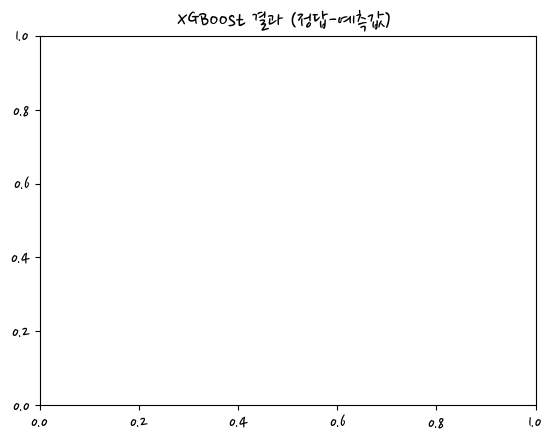

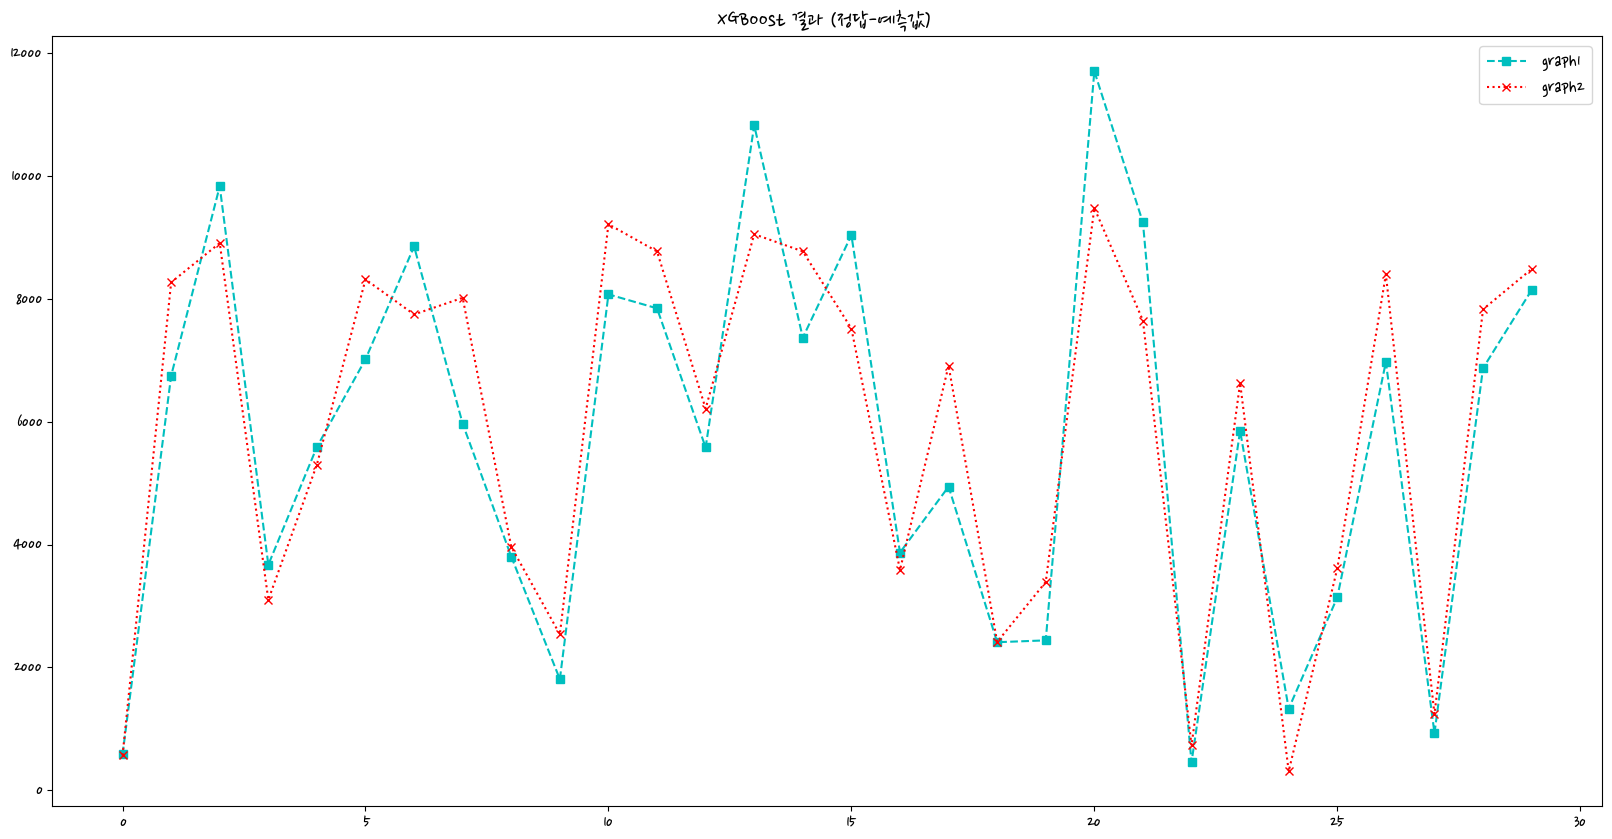

In [41]:
x_li = []
y_li = []
# 루트치환값 다시 원래대로 돌려서 비교
y_t= np.expm1(y_test)
p_t = np.expm1(pred)
for solve, predd in zip(np.expm1(y_test), np.expm1(pred)):
    print(f'{solve}, {predd}') 
    x_li.append(solve)
    y_li.append(predd)
    
num_li = np.arange(len(x_li))

x = num_li[:30]
y = x_li[:30]
z = y_li[:30]
plt.title("XGBoost 결과 (정답-예측값) ")
plt.savefig('myfigure.png', transparent = True)
plt.figure(figsize=(20,10))
plt.plot(x, y, 'cs--', label = 'graph1') # cyan 색, square 마커
plt.plot(x, z, 'rx:', label = 'graph2')
plt.legend() # 범례 표시
plt.title("XGBoost 결과 (정답-예측값) ")
plt.show()

# GBM

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
gb_ref = GradientBoostingRegressor(random_state=32)
gb_ref.fit(X_train, y_train)
gb_pred = gb_ref.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, pred)}')

RMSE:  0.35
R2: 0.8206695227981383


In [44]:
params = {
    'max_depth':[3],
    'learning_rate':[0.05],
    #'objective':'binary:logistic',
    # 'eval_metric':'logloss'
}
num_rounds = 400

In [45]:
grid_cv = GridSearchCV(gb_ref, param_grid=params , cv = 2, n_jobs=-1)
grid_cv.fit(X_train, y_train)
pred = grid_cv.predict(X_test)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('MSE: ', np.round(mse,3))
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, pred)}')

{'learning_rate': 0.05, 'max_depth': 3}
0.8143609497947379
MSE:  0.131
RMSE:  0.361
R2: 0.8090403174312449


586.0000000000002, 572.1540297771314
6748.999999999997, 7926.735256791609
9834.000000000007, 8197.409350346943
3671.9999999999977, 2932.6120492299565
5590.0, 5556.841370218035
7018.0000000000055, 8006.445822891296
8853.999999999996, 7264.564893797185
5968.000000000004, 7142.612063669636
3804.9999999999986, 3718.7955680088744
1807.9999999999995, 2802.9464046388916
8075.000000000005, 8261.44823168887
7847.0000000000055, 8261.44823168887
5581.999999999997, 7756.459484385719
10826.999999999998, 8261.44823168887
7369.0, 8261.44823168887
9038.999999999998, 6971.0502143195345
3871.0000000000027, 3877.635571954733
4944.000000000003, 6601.692956243898
2410.999999999999, 2442.400892855495
2441.0, 3785.6088261887335
11707.00000000001, 8534.770942360195
9245.0, 7357.636280570603
455.00000000000017, 972.6652542726318
5853.000000000004, 7312.596232713964
1329.0000000000002, 695.6094999763158
3141.0000000000005, 3898.3067045491653
6975.000000000002, 8006.445822891296
930.0000000000001, 1497.517113695

<Figure size 640x480 with 0 Axes>

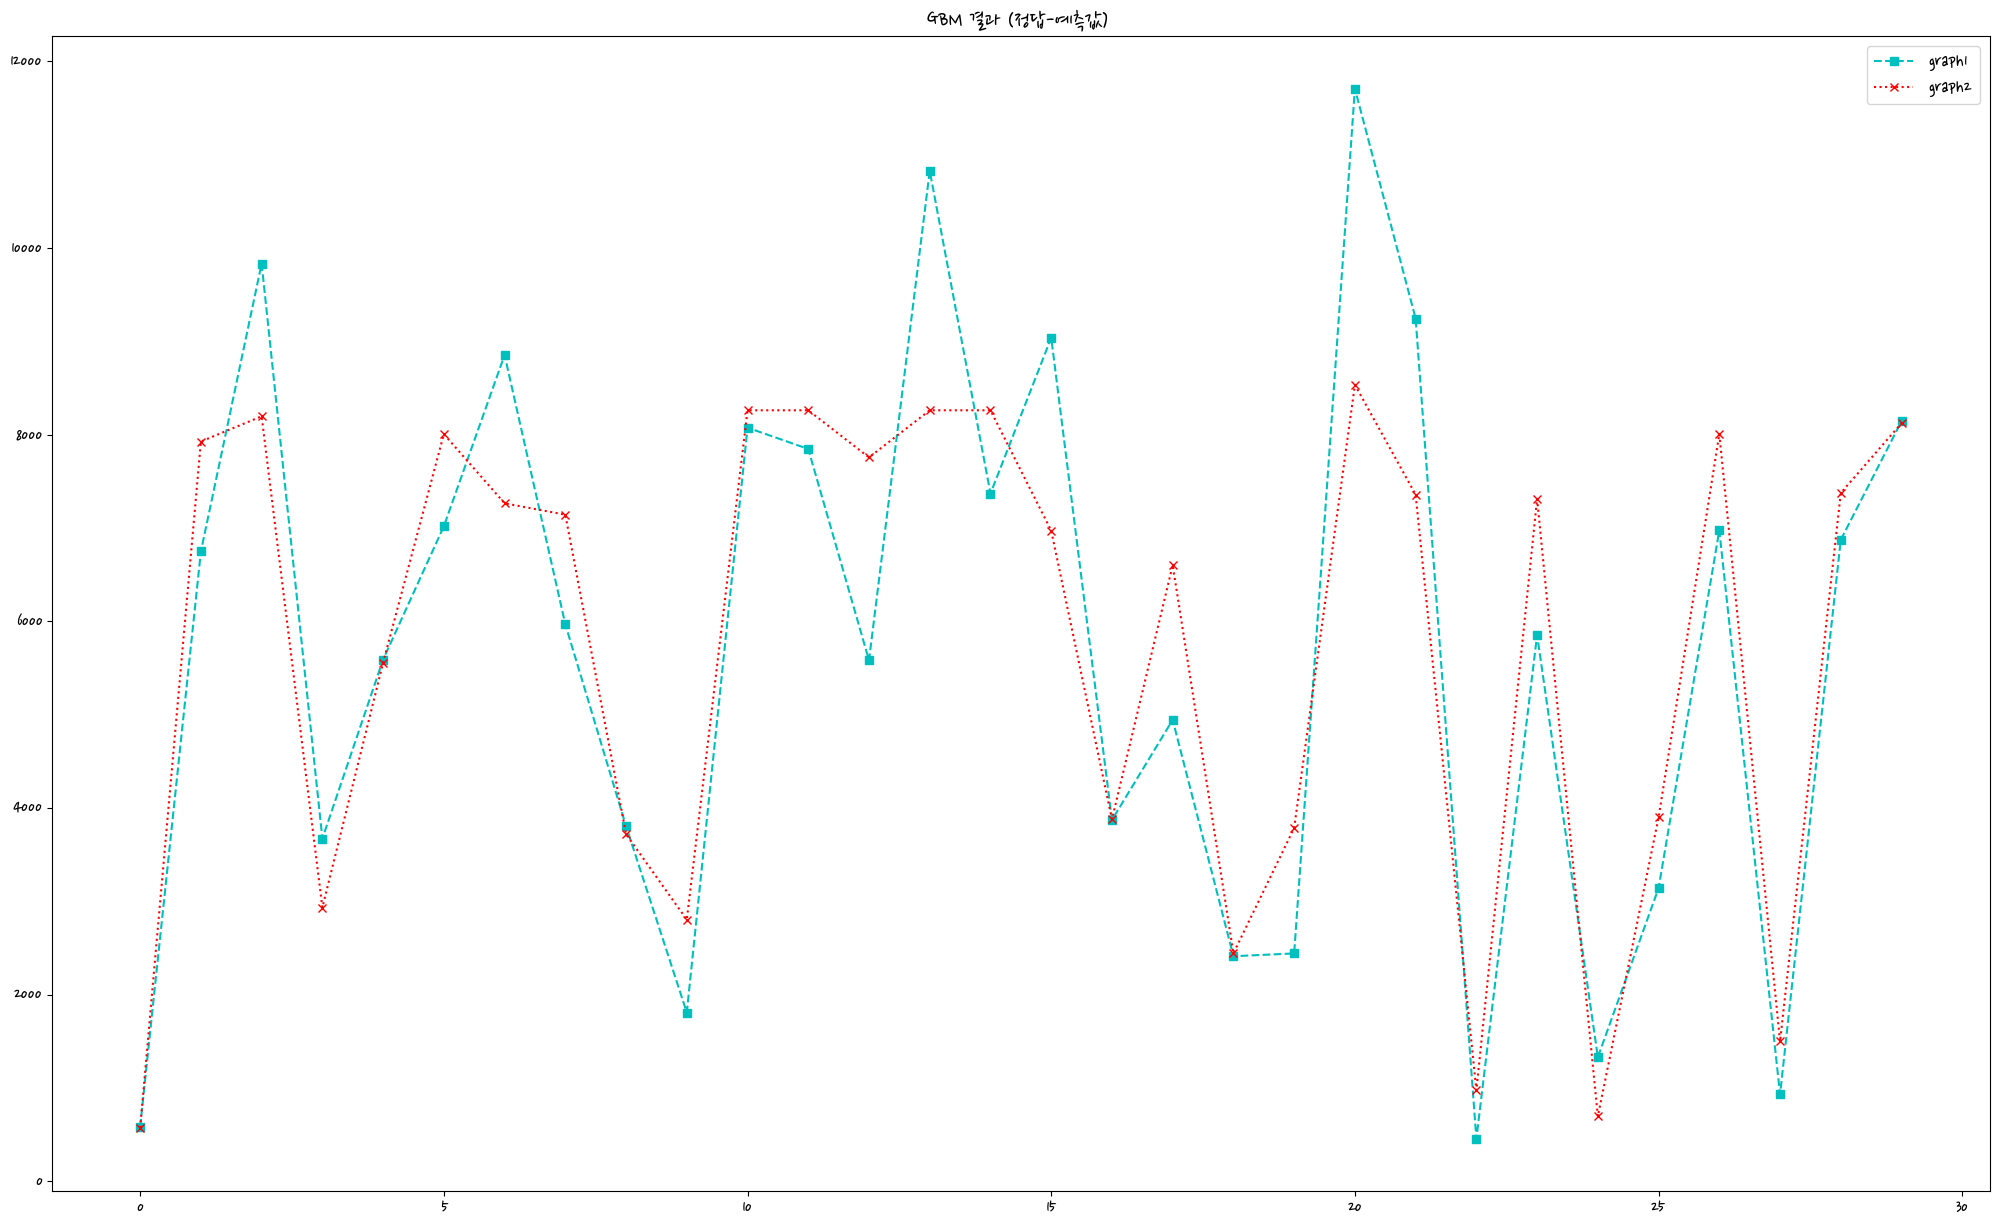

In [46]:
x_li = []
y_li = []
# 루트치환값 다시 원래대로 돌려서 비교
y_t= np.expm1(y_test)
p_t = np.expm1(pred)
for solve, predd in zip(y_t, p_t):
    print(f'{solve}, {predd}') 
    x_li.append(solve)
    y_li.append(predd)
    
num_li = np.arange(len(x_li))

x = num_li[:30]
y = x_li[:30]
z = y_li[:30]

plt.savefig('myfigure.png', transparent = True)
plt.figure(figsize=(25,15))
plt.plot(x, y, 'cs--', label = 'graph1') # cyan 색, square 마커
plt.plot(x, z, 'rx:', label = 'graph2')
plt.legend() # 범례 표시
plt.title("GBM 결과 (정답-예측값) ")
plt.show()

# LightGBM

In [47]:
from lightgbm import LGBMRegressor

In [48]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=32)
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.05)

evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbm.predict(X_test)

mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)

print('MSE: ', np.round(mse,3))
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, preds)}')

[1]	training's l2: 0.666447	valid_1's l2: 0.696316
Training until validation scores don't improve for 100 rounds
[2]	training's l2: 0.61707	valid_1's l2: 0.650066
[3]	training's l2: 0.572415	valid_1's l2: 0.607367
[4]	training's l2: 0.531833	valid_1's l2: 0.571331
[5]	training's l2: 0.494959	valid_1's l2: 0.534772
[6]	training's l2: 0.461334	valid_1's l2: 0.504657
[7]	training's l2: 0.430049	valid_1's l2: 0.475325
[8]	training's l2: 0.402175	valid_1's l2: 0.448074
[9]	training's l2: 0.377113	valid_1's l2: 0.423734
[10]	training's l2: 0.353461	valid_1's l2: 0.402901
[11]	training's l2: 0.331773	valid_1's l2: 0.38118
[12]	training's l2: 0.312232	valid_1's l2: 0.363782
[13]	training's l2: 0.293738	valid_1's l2: 0.34657
[14]	training's l2: 0.277174	valid_1's l2: 0.332685
[15]	training's l2: 0.261436	valid_1's l2: 0.316519
[16]	training's l2: 0.247291	valid_1's l2: 0.302729
[17]	training's l2: 0.234549	valid_1's l2: 0.290169
[18]	training's l2: 0.222556	valid_1's l2: 0.278059
[19]	training'

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

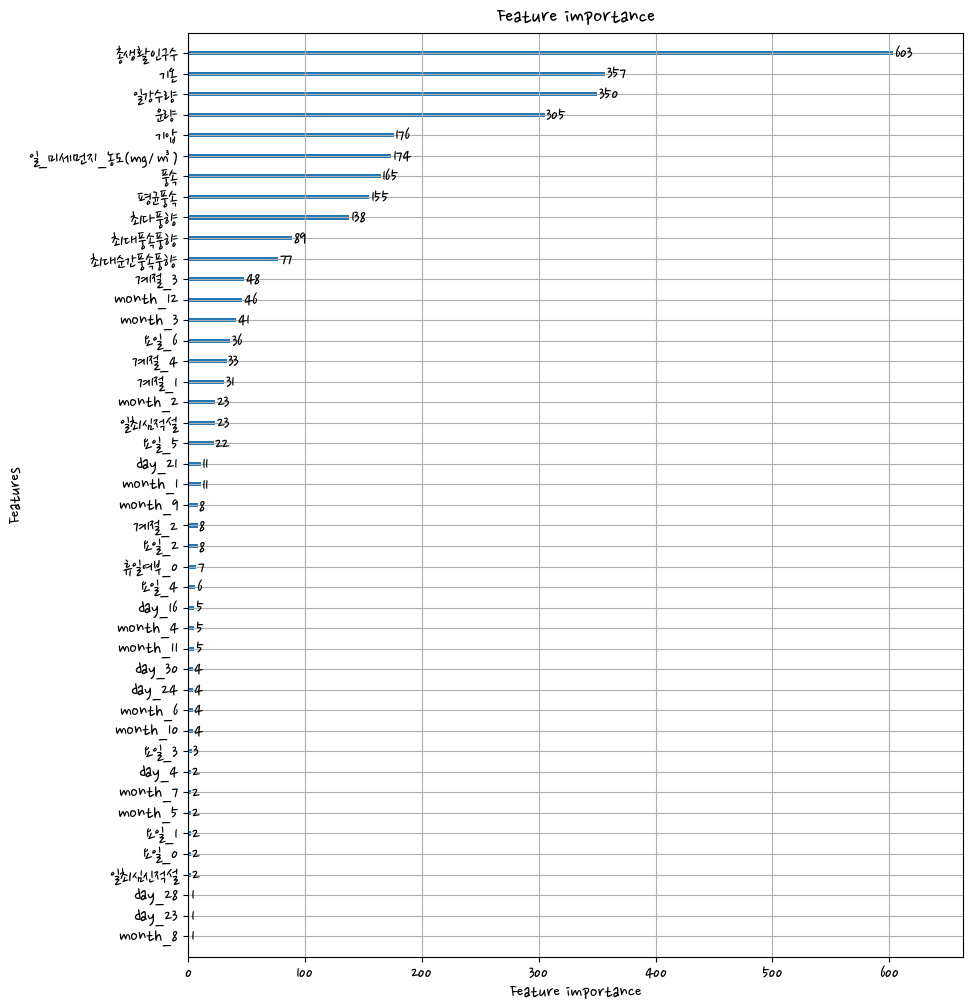

In [49]:
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm, ax=ax)

586.0000000000002, 572.1540297771314
6748.999999999997, 7926.735256791609
9834.000000000007, 8197.409350346943
3671.9999999999977, 2932.6120492299565
5590.0, 5556.841370218035
7018.0000000000055, 8006.445822891296
8853.999999999996, 7264.564893797185
5968.000000000004, 7142.612063669636
3804.9999999999986, 3718.7955680088744
1807.9999999999995, 2802.9464046388916
8075.000000000005, 8261.44823168887
7847.0000000000055, 8261.44823168887
5581.999999999997, 7756.459484385719
10826.999999999998, 8261.44823168887
7369.0, 8261.44823168887
9038.999999999998, 6971.0502143195345
3871.0000000000027, 3877.635571954733
4944.000000000003, 6601.692956243898
2410.999999999999, 2442.400892855495
2441.0, 3785.6088261887335
11707.00000000001, 8534.770942360195
9245.0, 7357.636280570603
455.00000000000017, 972.6652542726318
5853.000000000004, 7312.596232713964
1329.0000000000002, 695.6094999763158
3141.0000000000005, 3898.3067045491653
6975.000000000002, 8006.445822891296
930.0000000000001, 1497.517113695

<Figure size 640x480 with 0 Axes>

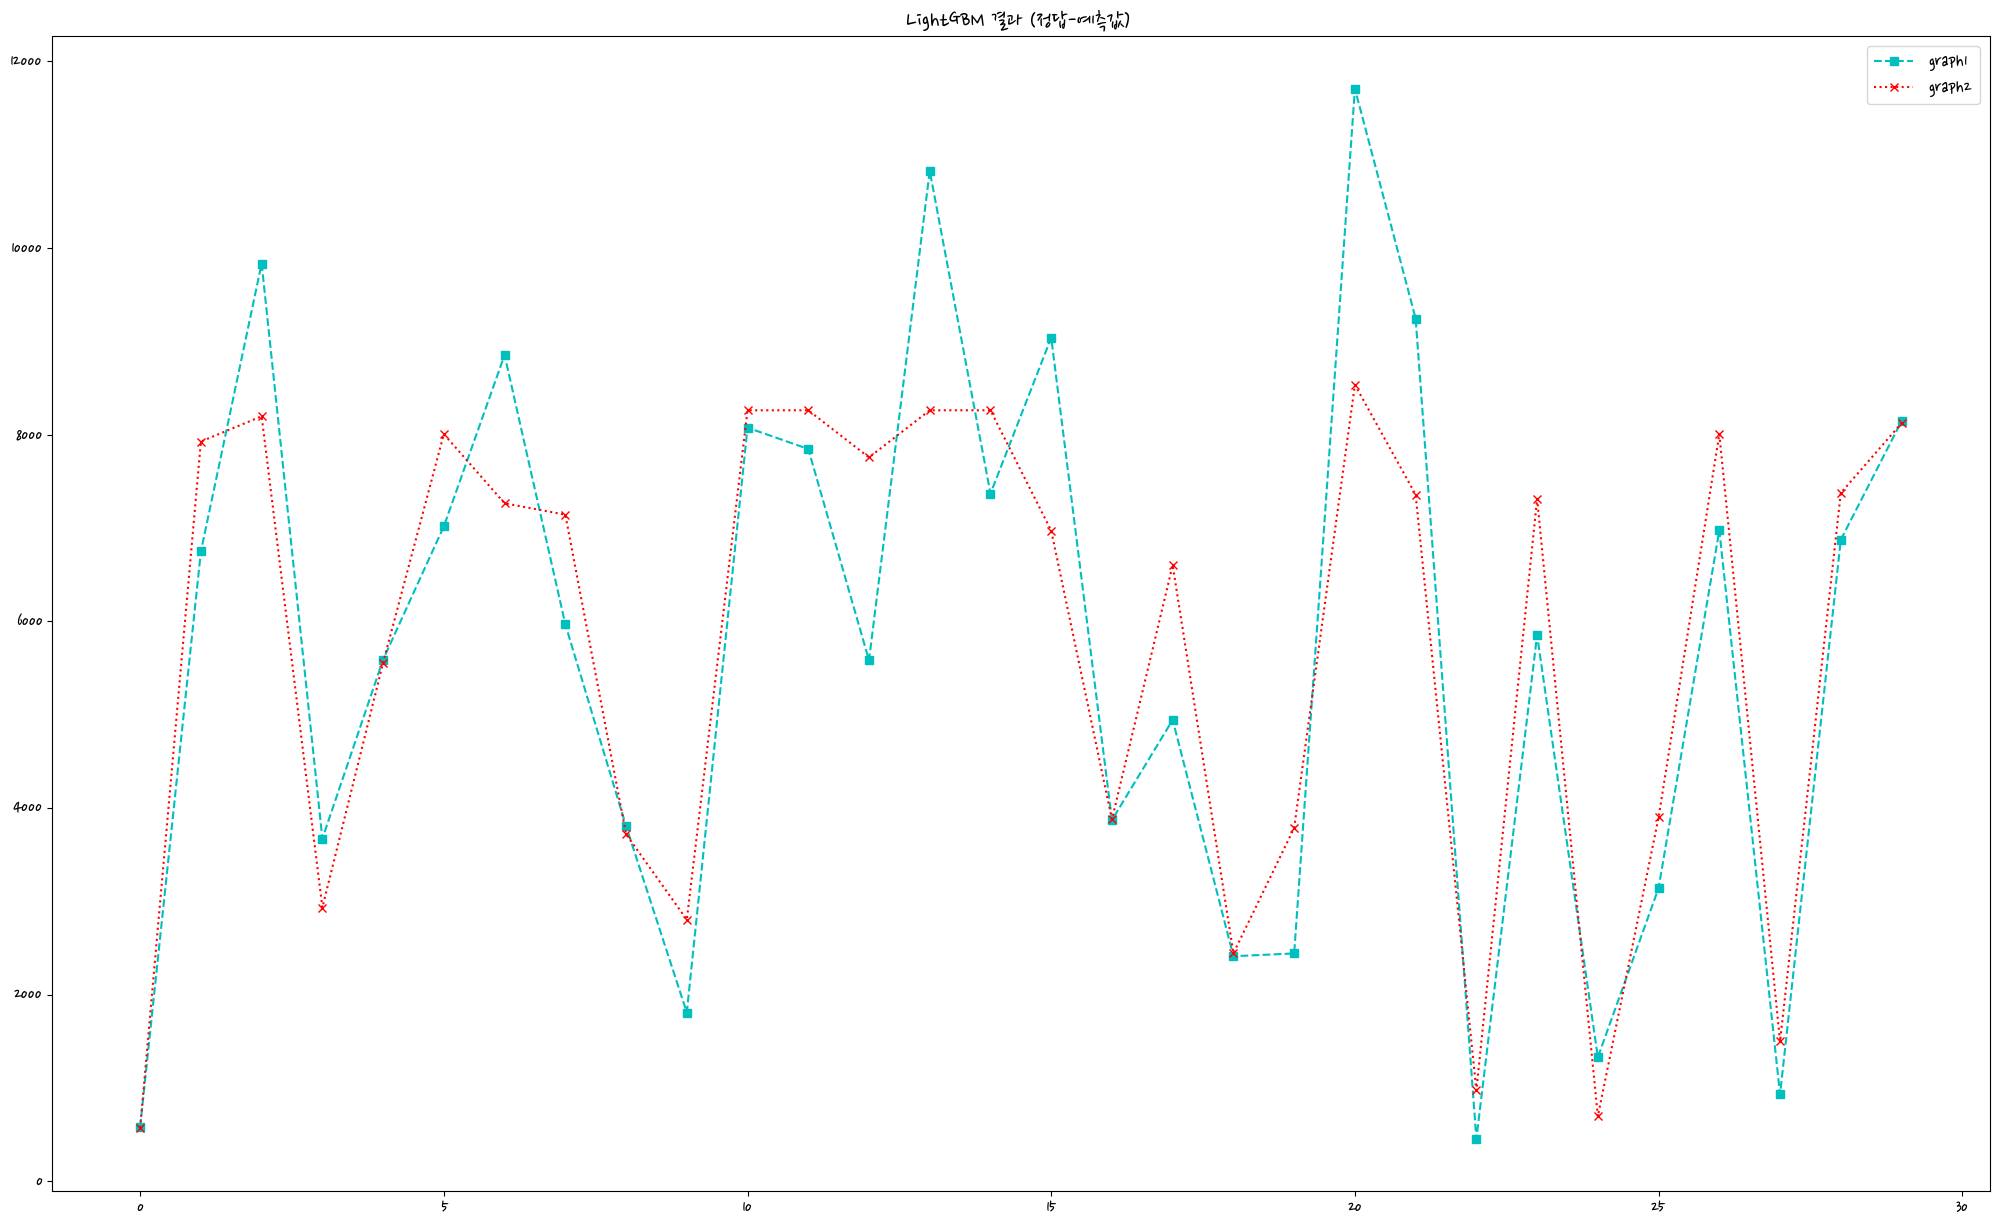

In [50]:
x_li = []
y_li = []
# 루트치환값 다시 원래대로 돌려서 비교
y_t= np.expm1(y_test)
p_t = np.expm1(pred)
for solve, predd in zip(y_t, p_t):
    print(f'{solve}, {predd}') 
    x_li.append(solve)
    y_li.append(predd)
    
num_li = np.arange(len(x_li))

x = num_li[:30]
y = x_li[:30]
z = y_li[:30]

plt.savefig('myfigure.png', transparent = True)
plt.figure(figsize=(25,15))
plt.plot(x, y, 'cs--', label = 'graph1') # cyan 색, square 마커
plt.plot(x, z, 'rx:', label = 'graph2')
plt.legend() # 범례 표시
plt.title("LightGBM 결과 (정답-예측값) ")
plt.show()

In [51]:
for solve, predd in zip(np.expm1(y_test), np.expm1(pred)):
    print(f'{solve}, {predd}')

586.0000000000002, 572.1540297771314
6748.999999999997, 7926.735256791609
9834.000000000007, 8197.409350346943
3671.9999999999977, 2932.6120492299565
5590.0, 5556.841370218035
7018.0000000000055, 8006.445822891296
8853.999999999996, 7264.564893797185
5968.000000000004, 7142.612063669636
3804.9999999999986, 3718.7955680088744
1807.9999999999995, 2802.9464046388916
8075.000000000005, 8261.44823168887
7847.0000000000055, 8261.44823168887
5581.999999999997, 7756.459484385719
10826.999999999998, 8261.44823168887
7369.0, 8261.44823168887
9038.999999999998, 6971.0502143195345
3871.0000000000027, 3877.635571954733
4944.000000000003, 6601.692956243898
2410.999999999999, 2442.400892855495
2441.0, 3785.6088261887335
11707.00000000001, 8534.770942360195
9245.0, 7357.636280570603
455.00000000000017, 972.6652542726318
5853.000000000004, 7312.596232713964
1329.0000000000002, 695.6094999763158
3141.0000000000005, 3898.3067045491653
6975.000000000002, 8006.445822891296
930.0000000000001, 1497.517113695